In [1]:
import numpy as np
import pandas as pd

In [2]:
trump=pd.read_csv('/content/Trumpall2.csv')
biden=pd.read_csv('/content/Bidenall2.csv')

In [3]:
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [4]:
from textblob import TextBlob
import re

In [5]:
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [6]:
trump['new_text']=trump['text'].apply(remove_url)

In [7]:
def find_pol(review):
  return TextBlob(review).sentiment.polarity

In [8]:
trump['Sentiment']=trump['new_text'].apply(find_pol)

In [9]:
trump.head()

,user,text,new_text,Sentiment
0,manny_rosen,@sanofi please tell us how many shares the Cr...,sanofi please tell us how many shares the Crim...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",Like comment RT Prayer4TachaNTitans Prayer4Tac...,0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,Your AG Barr is as useless amp corrupt as you ...,-0.50
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,Mr Trump Wake Up Most of the comments below yo...,0.50
4,James09254677,After 4 years you think you would have figure...,After 4 years you think you would have figured...,0.00


In [10]:
def labels(review):
  if review>0:
    return 'positive'

  elif review<0:
    return 'negative'
  elif review==0:
    return 'neutral'

In [11]:
trump['Labels']=trump['Sentiment'].apply(labels)

In [12]:
trump.head()

,user,text,new_text,Sentiment,Labels
0,manny_rosen,@sanofi please tell us how many shares the Cr...,sanofi please tell us how many shares the Crim...,0.05,positive
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",Like comment RT Prayer4TachaNTitans Prayer4Tac...,0.00,neutral
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,Your AG Barr is as useless amp corrupt as you ...,-0.50,negative
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,Mr Trump Wake Up Most of the comments below yo...,0.50,positive
4,James09254677,After 4 years you think you would have figure...,After 4 years you think you would have figured...,0.00,neutral


In [13]:
trump = trump[trump.Sentiment != 0.00]

In [14]:
trump['Labels'].value_counts()

positive    739
negative    598
Name: Labels, dtype: int64

In [15]:
biden.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [16]:
biden['new_text']=biden['text'].apply(remove_url)

In [17]:
import re

In [18]:
biden.head()

,user,text,new_text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,JoeBiden And well find out who won in 2026
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,JoeBiden Your Democratic Nazi Party cannot be ...
2,OldlaceA,@JoeBiden So did Lying Barr,JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,JoeBiden Its clear you didnt compose this twee...
4,Aquarian0264,@JoeBiden I will vote in person thank you.,JoeBiden I will vote in person thank you


In [19]:
biden['Sentiment']=biden['new_text'].apply(find_pol)

In [20]:
biden.head()

,user,text,new_text,Sentiment
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,JoeBiden And well find out who won in 2026,0.00
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,JoeBiden Your Democratic Nazi Party cannot be ...,0.00
2,OldlaceA,@JoeBiden So did Lying Barr,JoeBiden So did Lying Barr,0.00
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,JoeBiden Its clear you didnt compose this twee...,0.05
4,Aquarian0264,@JoeBiden I will vote in person thank you.,JoeBiden I will vote in person thank you,0.00


In [21]:
biden['Labels']=biden['Sentiment'].apply(labels)

In [22]:
biden.head()

,user,text,new_text,Sentiment,Labels
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,JoeBiden And well find out who won in 2026,0.00,neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,JoeBiden Your Democratic Nazi Party cannot be ...,0.00,neutral
2,OldlaceA,@JoeBiden So did Lying Barr,JoeBiden So did Lying Barr,0.00,neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,JoeBiden Its clear you didnt compose this twee...,0.05,positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,JoeBiden I will vote in person thank you,0.00,neutral


In [23]:
biden['Labels'].value_counts()

neutral     1491
positive     626
negative     423
Name: Labels, dtype: int64

In [24]:
biden = biden[biden.Sentiment != 0.00]

In [25]:
biden

,user,text,new_text,Sentiment,Labels
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,JoeBiden Its clear you didnt compose this twee...,0.050000,positive
5,FabrizioBenass4,@JoeBiden #ALL LIVES MATTER #HUMAN RIGHTS HELP...,JoeBiden ALL LIVES MATTER HUMAN RIGHTS HELP FO...,0.033333,positive
13,candyisyummy333,@JoeBiden My standard reply to propaganda: htt...,JoeBiden My standard reply to propaganda,-0.050000,negative
14,5h0rtie,@JoeBiden @richardmarx Trouble is trump voted ...,JoeBiden richardmarx Trouble is trump voted fo...,-0.200000,negative
15,shut_up_stewart,@JoeBiden I honestly cannot comprehend how a c...,JoeBiden I honestly cannot comprehend how a co...,-0.025000,negative
...,...,...,...,...,...
2532,Gypsy0112,@JoeBiden The only you can do to calm the wat...,JoeBiden The only you can do to calm the water...,0.100000,positive
2534,virgil_merchant,@JoeBiden fire is the last thing our country n...,JoeBiden fire is the last thing our country ne...,0.142857,positive
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,JoeBiden Youll just try to calm those waters a...,0.150000,positive
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,JoeBiden Trump wants our children back at scho...,0.100000,positive


In [26]:
import seaborn as sns

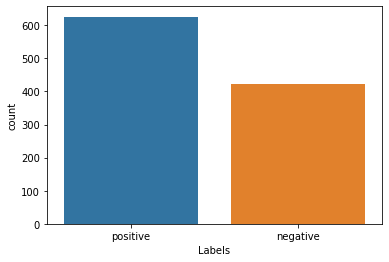

In [27]:
sns.countplot(x="Labels", data=biden)

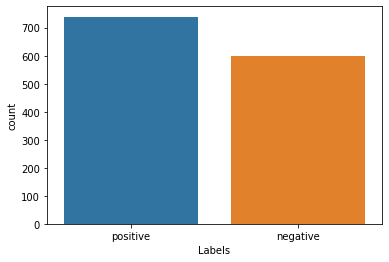

In [28]:
sns.countplot(x="Labels", data=trump)

In [29]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


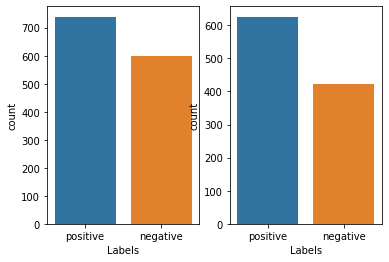

In [30]:
fig, ax =plt.subplots(1,2)
sns.countplot(trump['Labels'], ax=ax[0])
sns.countplot(biden['Labels'], ax=ax[1])
fig.show()